## Estimate mutation rates from Jonsson data

Data from Jónsson et al., 2017 *Parental influence on human germline de novo mutations in 1,548 trios from iceland*.

In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
from scipy.stats import beta
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Calculate average mutation rate and point mutation rate

In [8]:
dnms = 108778  # (note this is dnm rate not SNP rate)
snps = 101377  # i.e. de novo mutations that are point mutations
probands = 1548     #i.e. sample size (there are 2 chromosomes per proband)
sites = 2.683e9  #i.e. number of sites in autosomal genome processed by Jónsson
dup = 6034*.971*.421   #duplicate twin sites to be excluded (see Jonsson et al. p520, first para)
print((dnms - dup) / (sites * probands * 2))
print((snps - dup) / (sites * probands * 2))

1.2798469248190107e-08
1.1907487557556863e-08


Calculate posterior distribution of mutation rate and point mutation rate

SNPs- mode of posterior distribution:   1.1907607944216695e-08
SNPs- mean of posterior distribution:   1.1907487557556863e-08
SNPs- standard deviation of posterior:  3.786162530995259e-11

DNMs- mode of posterior distribution:  1.2798589634849724e-08
DNMs- mean of posterior distribution:  1.2798469248190107e-08


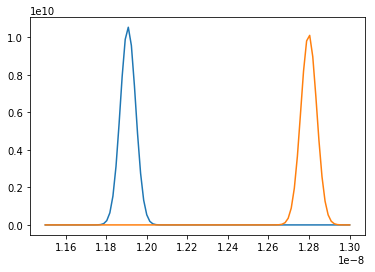

In [18]:
a = snps - dup 
b = sites * probands * 2 - (snps - dup)
x = np.linspace(1.15e-8, 1.30e-8, 100)
y = beta.pdf(x, a + 1, b + 1)
plt.plot(x, y)
print('SNPs- mode of posterior distribution:  ', (a + 1) / (a + b + 2))
print('SNPs- mean of posterior distribution:  ', a  / (a + b))
v = (a * b) / ((a + b + 1) * (a + b)**2)
print('SNPs- standard deviation of posterior: ', np.sqrt(v))
a2 = dnms - dup 
b2 = sites * probands * 2 - (dnms - dup)
y2 = beta.pdf(x, a2 + 1, b2 + 1)
print('\nDNMs- mode of posterior distribution: ', (a2 + 1) / (a2 + b2 + 2))
print('DNMs- mean of posterior distribution: ', a2  / (a2 + b2))
plt.plot(x, y2)
plt.show()

Calculate confident limits for mutation rates.

In [20]:
percent = 95
quantiles = beta.interval(percent / 100, a + 1, b + 1)
print(str(percent) + '% confidence limits for point mutation rate: ', quantiles)
#quantiles = np.array(quantiles)
#quantiles = (((quantiles * seq_len) / (dnm_count * snp_count)) - 1) * mut_rate**2

95% confidence limits for point mutation rate:  (1.1833513835222511e-08, 1.1981929781690326e-08)


Calculate average mutation rates for each chromosome separately.

In [25]:
chr_lengths = [248956422, 242193529, 198295559, 190214555, 181538259, 170805979, 159345973, 145138636,\
               138394717, 133797422, 135086622, 133275309, 114364328, 107043718, 101991189, 90338345,\
               83257441, 80373285, 58617616, 64444167, 46709983, 50818468]
print(sum(chr_lengths))
chr_lengths_adj = np.array(chr_lengths) * (sites / sum(chr_lengths))
path = "/Users/helmutsimon/Google Drive/Genetics/De novo mutations project PRJEB21300"
if not os.getcwd() == path:
    os.chdir(path)
fname = 'PRJEB21300_all_SNPs.csv'
snp_tab = pd.read_csv(fname, sep=',', index_col=0)
chrs = snp_tab['chr']
dnm_counts = Counter(chrs)
mrates = list()
for i in range(1, 23):
    chr = 'chr' + str(i)
    mrate = dnm_counts[chr] / (chr_lengths_adj[i - 1] * probands * 2)
    print(i, mrate)
    mrates.append(mrate)
print(mrates)

2875001522
1 1.1045541764661985e-08
2 1.2481509352581898e-08
3 1.254443516411994e-08
4 1.2609734521720365e-08
5 1.216379148788216e-08
6 1.2228991967962778e-08
7 1.2298304077726808e-08
8 1.3325693328599174e-08
9 1.0711369887343474e-08
10 1.238059175011868e-08
11 1.2241940318060874e-08
12 1.2117457093135447e-08
13 1.0174746106096945e-08
14 1.0146311894484388e-08
15 1.0516600482736078e-08
16 1.2597261162425896e-08
17 1.1681529656302903e-08
18 1.1855256275211491e-08
19 1.214570124735936e-08
20 1.1756514975959873e-08
21 8.965863348091259e-09
22 9.024242643357694e-09
[1.1045541764661985e-08, 1.2481509352581898e-08, 1.254443516411994e-08, 1.2609734521720365e-08, 1.216379148788216e-08, 1.2228991967962778e-08, 1.2298304077726808e-08, 1.3325693328599174e-08, 1.0711369887343474e-08, 1.238059175011868e-08, 1.2241940318060874e-08, 1.2117457093135447e-08, 1.0174746106096945e-08, 1.0146311894484388e-08, 1.0516600482736078e-08, 1.2597261162425896e-08, 1.1681529656302903e-08, 1.1855256275211491e-08, 1.